In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder

In [48]:
df = pd.read_csv(r"C:\Users\User\Desktop\Machine Learning\ML_Task_01\dataset_combined_new.csv")
print(df)

                                                  Path     Identity  \
0    C:\Users\User\Desktop\Machine Learning\Persona...  Hamza Ahmad   
1    C:\Users\User\Desktop\Machine Learning\Persona...  Hamza Ahmad   
2    C:\Users\User\Desktop\Machine Learning\Persona...  Hamza Ahmad   
3    C:\Users\User\Desktop\Machine Learning\Persona...  Hamza Ahmad   
4    C:\Users\User\Desktop\Machine Learning\Persona...  Hamza Ahmad   
..                                                 ...          ...   
194  C:\Users\User\Desktop\Machine Learning\Other\G...      Unknown   
195  C:\Users\User\Desktop\Machine Learning\Other\G...      Unknown   
196  C:\Users\User\Desktop\Machine Learning\Other\G...      Unknown   
197  C:\Users\User\Desktop\Machine Learning\Other\G...      Unknown   
198  C:\Users\User\Desktop\Machine Learning\Other\G...      Unknown   

      Expression  Age  
0        Smiling   23  
1    Not Smiling   23  
2    Not Smiling   23  
3        Smiling   23  
4    Not Smiling   23  
.. 

In [49]:
df.tail(10)

,Path,Identity,Expression,Age
189,C:\Users\User\Desktop\Machine Learning\Other\G...,Unknown,Not Smiling,71
190,C:\Users\User\Desktop\Machine Learning\Other\G...,Unknown,Smiling,75
191,C:\Users\User\Desktop\Machine Learning\Other\G...,Unknown,Not Smiling,52
192,C:\Users\User\Desktop\Machine Learning\Other\G...,Unknown,Not Smiling,77
193,C:\Users\User\Desktop\Machine Learning\Other\G...,Unknown,Not Smiling,70
194,C:\Users\User\Desktop\Machine Learning\Other\G...,Unknown,Smiling,68
195,C:\Users\User\Desktop\Machine Learning\Other\G...,Unknown,Not Smiling,59
196,C:\Users\User\Desktop\Machine Learning\Other\G...,Unknown,Angry,72
197,C:\Users\User\Desktop\Machine Learning\Other\G...,Unknown,Smiling,42
198,C:\Users\User\Desktop\Machine Learning\Other\G...,Unknown,Not Smiling,73


In [50]:
train, test = train_test_split(df, test_size=0.3, random_state = 8, stratify=df['Expression'])

In [51]:
train.loc[train['Expression'] == "Smiling"].describe()

,Age
count,61.000000
mean,36.688525
std,20.904976
min,23.000000
25%,23.000000
50%,23.000000
75%,50.000000
max,96.000000


In [52]:
X_data = train['Path']
X_tdata = test['Path']
y1_train = train['Identity']
y2_train = train['Expression']
y3_train = train['Age']
y1_test = test['Identity']
y2_test = test['Expression']
y3_test = test['Age']

In [53]:
import skimage
from skimage import io
from skimage import transform

def preprocess_image(path):
    curr_image = io.imread(path)
    img_resize = transform.resize(curr_image, output_shape=(32, 32, 3))
    img_reshape = np.reshape(img_resize, (32 * 32 * 3))
    return img_reshape / 255.

In [54]:
X_train = np.array([preprocess_image(path) for path in X_data])
X_test = np.array([preprocess_image(path) for path in X_tdata])

In [55]:
print(X_train)
print()
print(X_test)

[[2.21068483e-03 2.11639036e-03 1.83502117e-03 ... 3.89552288e-03
  3.89553896e-03 3.88765821e-03]
 [1.86268518e-03 1.20140400e-03 9.09199857e-04 ... 2.80211396e-04
  2.68544273e-04 2.34163938e-04]
 [2.97434307e-03 2.86359884e-03 2.51420322e-03 ... 4.46803178e-04
  4.71019654e-04 5.38668760e-04]
 ...
 [2.97284260e-03 2.97126405e-03 2.81270562e-03 ... 3.57166546e-04
  3.78074921e-04 5.16117819e-04]
 [2.52201845e-13 3.80128840e-13 5.89299496e-14 ... 3.15112389e-05
  1.50989881e-05 6.53266596e-06]
 [7.81309282e-04 9.81232447e-04 1.11964093e-03 ... 3.22456410e-03
  3.26624507e-03 3.23166242e-03]]

[[1.00133696e-03 1.18581468e-03 1.59347425e-03 ... 6.90295509e-05
  6.55956096e-05 8.59581566e-05]
 [6.24446419e-08 2.65284158e-08 2.52457321e-08 ... 1.17769419e-03
  1.21931872e-03 9.58939401e-04]
 [9.55124563e-09 3.46622910e-09 2.73342279e-09 ... 1.18654290e-03
  1.31380362e-03 1.37851098e-03]
 ...
 [1.68610721e-03 2.51967040e-03 3.40251922e-03 ... 1.59350851e-03
  1.71829282e-03 1.80786755e-03

In [65]:
train.head(10)

,Path,Identity,Expression,Age
36,C:\Users\User\Desktop\Machine Learning\Persona...,Hamza Ahmad,Not Smiling,23
159,C:\Users\User\Desktop\Machine Learning\Other\D...,Unknown,Smiling,72
16,C:\Users\User\Desktop\Machine Learning\Persona...,Hamza Ahmad,Smiling,23
44,C:\Users\User\Desktop\Machine Learning\Persona...,Hamza Ahmad,Smiling,23
120,C:\Users\User\Desktop\Machine Learning\Other\B...,Unknown,Not Smiling,70
3,C:\Users\User\Desktop\Machine Learning\Persona...,Hamza Ahmad,Smiling,23
54,C:\Users\User\Desktop\Machine Learning\Persona...,Hamza Ahmad,Not Smiling,23
64,C:\Users\User\Desktop\Machine Learning\Persona...,Hamza Ahmad,Smiling,23
41,C:\Users\User\Desktop\Machine Learning\Persona...,Hamza Ahmad,Not Smiling,23
149,C:\Users\User\Desktop\Machine Learning\Other\C...,Unknown,Not Smiling,68


In [57]:
label_encoder = LabelEncoder()
label_encoder.fit(y2_train)
print(y2_train)
encoded_labels1 = label_encoder.transform(y2_train)
print(encoded_labels1)
encoded_labels2 = label_encoder.transform(y2_test)
print()
print(encoded_labels2)

36     Not Smiling
159        Smiling
16         Smiling
44         Smiling
120    Not Smiling
          ...     
115    Not Smiling
68         Smiling
97         Smiling
132        Smiling
139    Not Smiling
Name: Expression, Length: 139, dtype: object
[1 2 2 2 1 2 1 2 1 1 1 1 2 2 1 1 1 2 2 1 1 2 1 1 2 1 2 1 1 2 2 1 2 1 1 1 1
 2 2 1 2 0 1 1 2 2 1 2 1 1 0 2 1 1 2 1 2 2 1 2 2 1 2 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 0 1 1 2 2 1 2 1 1 1 1 2 1 2 1 2 2 2 1 1 2 0 2 1 2 2 1 2 2 1 1 1 1 1
 2 1 2 2 2 2 1 2 2 2 1 1 2 2 1 1 1 2 2 2 1 0 2 1 2 2 2 1]

[1 0 1 1 2 1 1 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 1 2 2 1 2 1 1 2 1 1 1 2 1 1 1
 1 2 1 1 2 1 1 2 2 1 2 2 1 1 1 0 2 1 1 2 1 1 1]


In [58]:
input_layer = keras.layers.Input(shape=(32*32*3,))
X = keras.layers.Dense(3, activation='softmax')(input_layer)
model = keras.Model(inputs = input_layer, outputs = X)

In [59]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_3 (Dense)             (None, 3)                 9219      
                                                                 
Total params: 9,219
Trainable params: 9,219
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint3.h5',  # Filepath to save the model
    monitor='loss',  # Metric to monitor (validation loss in this case)
    save_best_only=True,  # Save only the best model
    save_weights_only=False,  # Save the entire model (including architecture)
    mode='min'  # Mode for comparison (minimizing the monitored metric)
)

In [61]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, encoded_labels1, epochs=50, batch_size=8, callbacks=[checkpoint_callback])

preds = model.predict(X_test)
# print(preds)

Epoch 1/50
18/18 [==============================] - 1s 6ms/step - loss: 1.0746 - accuracy: 0.4964
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 1.0259 - accuracy: 0.5252
Epoch 3/50
18/18 [==============================] - 0s 11ms/step - loss: 0.9861 - accuracy: 0.5252
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.9543 - accuracy: 0.5252
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.9279 - accuracy: 0.5252
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.9067 - accuracy: 0.5252
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.8890 - accuracy: 0.5252
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 0.8752 - accuracy: 0.5252
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 0.8625 - accuracy: 0.5252
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 0.8530 - accuracy: 0.5252
Epoch 11/50
18/18 

In [62]:
#Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, encoded_labels2)

print("Loss:", loss)
print("Accuracy:", accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.7769 - accuracy: 0.5667
Loss: 0.7768633365631104
Accuracy: 0.5666666626930237


In [64]:
print(preds)

[[0.03159905 0.52092046 0.44748053]
 [0.03651432 0.5527735  0.4107122 ]
 [0.09192398 0.48468816 0.4233878 ]
 [0.01353679 0.59235543 0.39410782]
 [0.03253469 0.48741108 0.48005426]
 [0.00910281 0.6157596  0.3751376 ]
 [0.03910471 0.5386226  0.42227265]
 [0.08049475 0.49485612 0.424649  ]
 [0.01457499 0.5347418  0.45068315]
 [0.0759247  0.5183869  0.4056884 ]
 [0.01842108 0.5620864  0.41949248]
 [0.10181082 0.47348145 0.42470774]
 [0.08706839 0.47374517 0.43918648]
 [0.01459108 0.53946483 0.445944  ]
 [0.03076563 0.58050036 0.38873395]
 [0.04206242 0.4782624  0.4796752 ]
 [0.01304697 0.58504856 0.40190437]
 [0.01282986 0.5954508  0.39171925]
 [0.13778974 0.42927235 0.4329379 ]
 [0.04704645 0.53726745 0.41568616]
 [0.03959428 0.5762156  0.38419005]
 [0.01583792 0.49563742 0.48852468]
 [0.01101863 0.5658837  0.42309764]
 [0.10252378 0.4587056  0.4387706 ]
 [0.01846735 0.48886815 0.49266452]
 [0.02210072 0.59076834 0.3871309 ]
 [0.06047798 0.5121663  0.42735577]
 [0.06280724 0.50896555 0.42

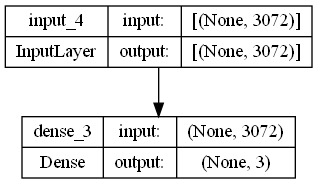

In [63]:
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True)